In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
df = pd.read_csv('data/partidos_cebollitas.csv')
df.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [15]:
scaler_norm = MinMaxScaler()
df[['tiros_arco_local', 'tiros_arco_visitante']] = scaler_norm.fit_transform(df[['tiros_arco_local', 'tiros_arco_visitante']])
df.head(10)

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,1.000000,0.333333,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,1.000000,0.000000,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,0.777778,0.444444,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,0.000000,0.000000,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,0.444444,1.000000,Estadio ML
5,2023-02-05,Data United,Cebollitas FC,3,3,60,40,0.555556,0.888889,Python Arena
6,2023-02-12,Data United,Real Pandas,4,1,49,51,0.111111,0.555556,Estadio ML
7,2023-02-19,Cebollitas FC,Real Pandas,1,2,56,44,0.222222,0.222222,Estadio ML
8,2023-02-26,NumPy City,Data United,1,5,60,40,0.666667,0.666667,Estadio DataCamp
9,2023-03-05,Atlético Python,Cebollitas FC,1,4,43,57,0.777778,0.444444,Estadio ML


In [16]:
scaler_std = StandardScaler()
df[['posesion_local (%)', 'posesion_visitante (%)']] = scaler_std.fit_transform(df[['posesion_local (%)', 'posesion_visitante (%)']])
df.head(10)

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,0.624415,-0.624415,1.000000,0.333333,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,1.623479,-1.623479,1.000000,0.000000,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,0.790926,-0.790926,0.777778,0.444444,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,1.123947,-1.123947,0.000000,0.000000,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,0.291394,-0.291394,0.444444,1.000000,Estadio ML
5,2023-02-05,Data United,Cebollitas FC,3,3,1.623479,-1.623479,0.555556,0.888889,Python Arena
6,2023-02-12,Data United,Real Pandas,4,1,-0.208138,0.208138,0.111111,0.555556,Estadio ML
7,2023-02-19,Cebollitas FC,Real Pandas,1,2,0.957436,-0.957436,0.222222,0.222222,Estadio ML
8,2023-02-26,NumPy City,Data United,1,5,1.623479,-1.623479,0.666667,0.666667,Estadio DataCamp
9,2023-03-05,Atlético Python,Cebollitas FC,1,4,-1.207202,1.207202,0.777778,0.444444,Estadio ML


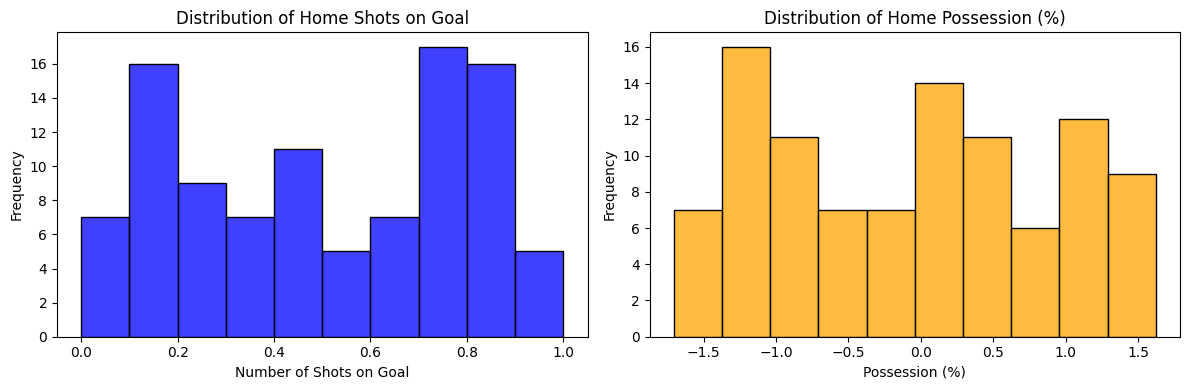

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['tiros_arco_local'], bins=10, kde=False, color='blue', ax=ax[0])
ax[0].set_title('Distribution of Home Shots on Goal')
ax[0].set_xlabel('Number of Shots on Goal')
ax[0].set_ylabel('Frequency')
sns.histplot(df['posesion_local (%)'], bins=10, kde=False, color='orange', ax=ax[1])
ax[1].set_title('Distribution of Home Possession (%)')
ax[1].set_xlabel('Possession (%)')
ax[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

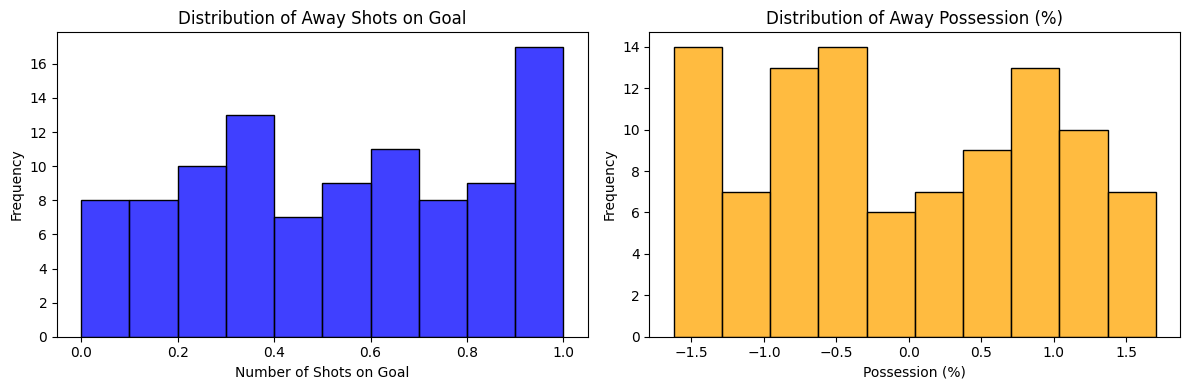

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['tiros_arco_visitante'], bins=10, kde=False, color='blue', ax=ax[0])
ax[0].set_title('Distribution of Away Shots on Goal')
ax[0].set_xlabel('Number of Shots on Goal')
ax[0].set_ylabel('Frequency')
sns.histplot(df['posesion_visitante (%)'], bins=10, kde=False, color='orange', ax=ax[1])
ax[1].set_title('Distribution of Away Possession (%)')
ax[1].set_xlabel('Possession (%)')
ax[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()